Мастер-класс. Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Домашнее задание
***

Это домашнее задание призвано укрепить ваши знания EDA. Давайте вернёмся к примеру с компанией Kiva. 

Для начала вспомним, чем занимается компания.

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




# 2. Разведочный анализ данных
***

Для выполнения работы сохраните копию на свой диск, нажав на кнопку «Файл» в верхней панели и выбрав «Сохранить копию на диск».

## Импорт библиотек

In [5]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [6]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

_________

### Задание 1. Проверьте, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета.

In [7]:
# kiva_loans
df_kiva_loans.head(3)


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [8]:
#df_mpi
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


Отлично! Данные загружены верно. Теперь давайте посмотрим, присутствуют ли в них пропуски. 
### Задание 2. Сделайте визуализацию для проверки наличия пропусков в двух наборах данных 

Используйте метод, показанный в лонгриде:

```
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');
```



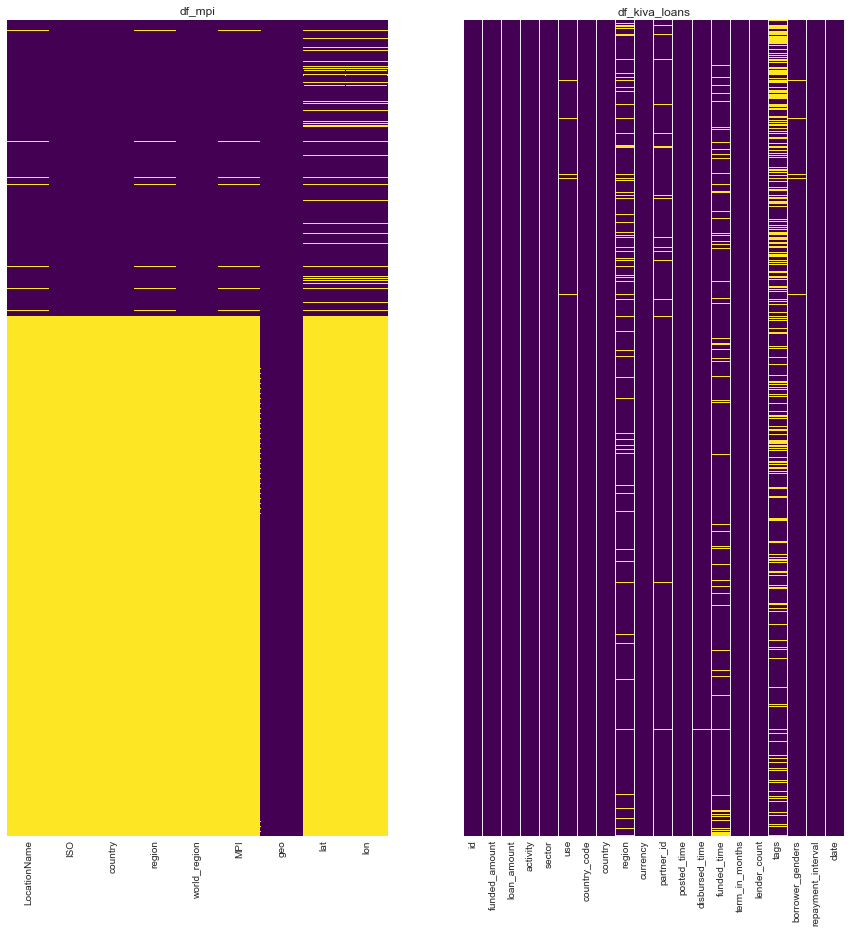

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
dat_set = [df_mpi, df_kiva_loans]
dat_set_text = ['df_mpi','df_kiva_loans']
for i, dat in enumerate(dat_set):
    ax = axs[i]
    sns.heatmap(dat.isnull(),cbar=False,yticklabels=False,cmap = 'viridis', ax=ax)
    ax.set_title(dat_set_text[i])



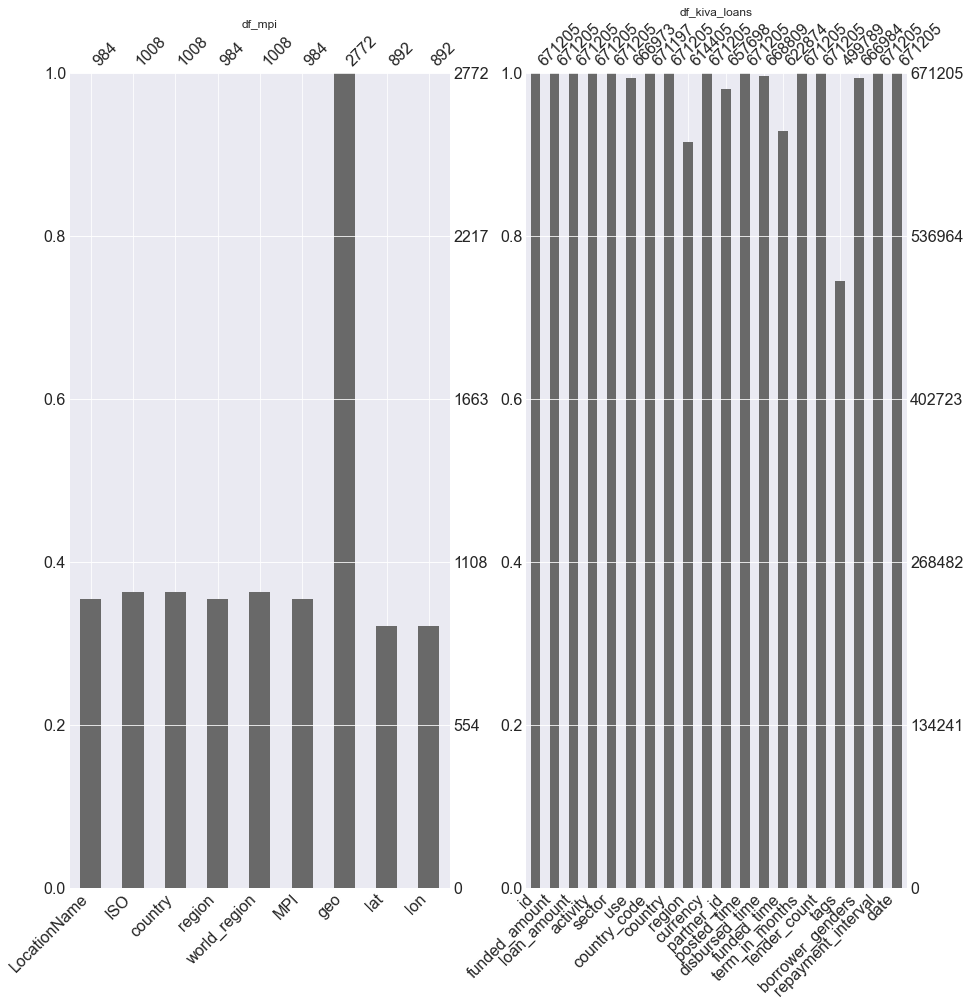

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
dat_set = [df_mpi, df_kiva_loans]
dat_set_text = ['df_mpi','df_kiva_loans']
for i, dat in enumerate(dat_set):
    ax = axs[i]
    msno.bar(dat, ax=ax)
    ax.set_title(dat_set_text[i])


В датасете `df_mpi` пропущены данные во всех колонках кроме `geo`

В датасете `df_kiva_loans` пропущены данные в следующих колонках
* `use`
* `region`
* `partner_id`
* `disbursed_time`
* `funded_time`
* `tags`
* `borrower genders`


**Что мы видим?**

В некоторых колонках присутствуют пропуски. 

Помимо визуализаций, наличие пропусков можно отследить с помощью метода ```info()```. 

### Задание 3. Попробуйте применить данный метод к нашим таблицам и сравните число ненулевых значений каждого признака с количеством строк датасетов



In [11]:
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [12]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки.

Так как пропусков в данных немного, давайте выбросим строки, содержащие NaN.
### Задание 4. С помощью метода ```dropna``` удалите строки с пропусками из датасетов

*Подсказка: чтобы не перезаписывать данные ```(data=data.dropna())```, используйте параметр ```inplace = True```*.

In [13]:
df_kiva_loans1 = df_kiva_loans.dropna()
df_mpi_got = df_mpi.dropna()

In [14]:
df_kiva_loans1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-nul

Посчитайте количество записей в таблицах после удаления строк, содержащих NaN.

In [15]:
df_mpi_got.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  892 non-null    object 
 1   ISO           892 non-null    object 
 2   country       892 non-null    object 
 3   region        892 non-null    object 
 4   world_region  892 non-null    object 
 5   MPI           892 non-null    float64
 6   geo           892 non-null    object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 69.7+ KB


_____________

## Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, настало время перейти к постановке гипотез и их проверке.


### Задание 1. Используя таблицу ```df_kiva_loans```, попробуйте найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит, (**lender_count**) и суммой займа (**loan_amount**). Какие выводы можно сделать из этих данных? 

**Для этого**:

1. Выделите три указанных столбца в отдельную таблицу `df_temp`.
2. Найдите корреляцию между признаками с помощью команды `df_temp.corr()`, сохраните полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируйте полученный результат, для наглядности задайте параметры `cmap='BrBG', annot=True`.




<AxesSubplot:>

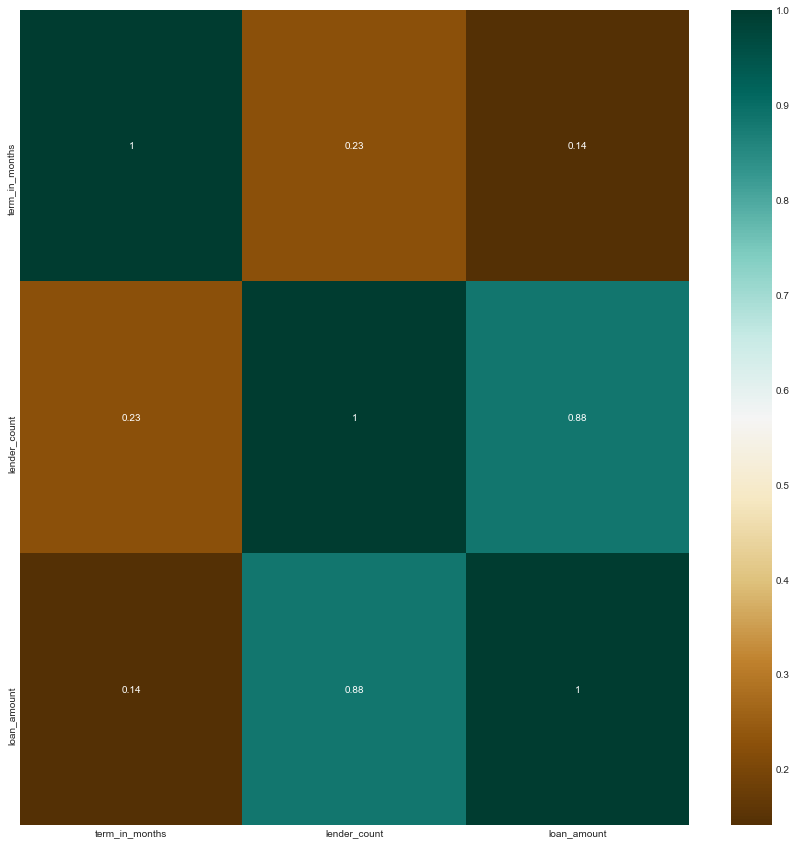

In [16]:
fig, axs = plt.subplots(figsize=(15,15))
df_temp = df_kiva_loans1[['term_in_months', 'lender_count', 'loan_amount']]
df_corr = df_temp.corr()
df_corr
sns.heatmap(data=df_corr, cmap='BrBG', annot=True)

 Довольно сильно корелируют между собой величины `lender_count` (количеством кредиторов, которые внесли свой вклад в этот кредит) и `loan_amount` суммой займа
Это и логично чем больше количество кредиторов, тем выше сумма займа 

### Задание 2. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

<AxesSubplot:xlabel='funded_amount', ylabel='Count'>

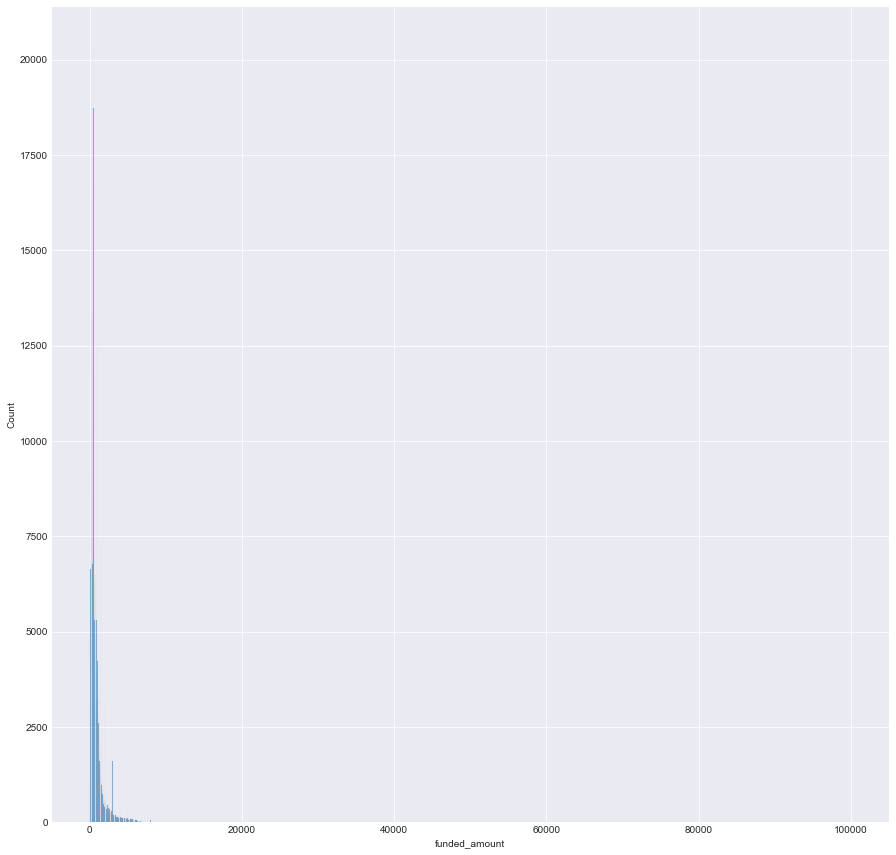

In [17]:
fig, axs = plt.subplots(figsize=(15,15))
sns.histplot(data=df_kiva_loans1, x='funded_amount', alpha=0.5)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


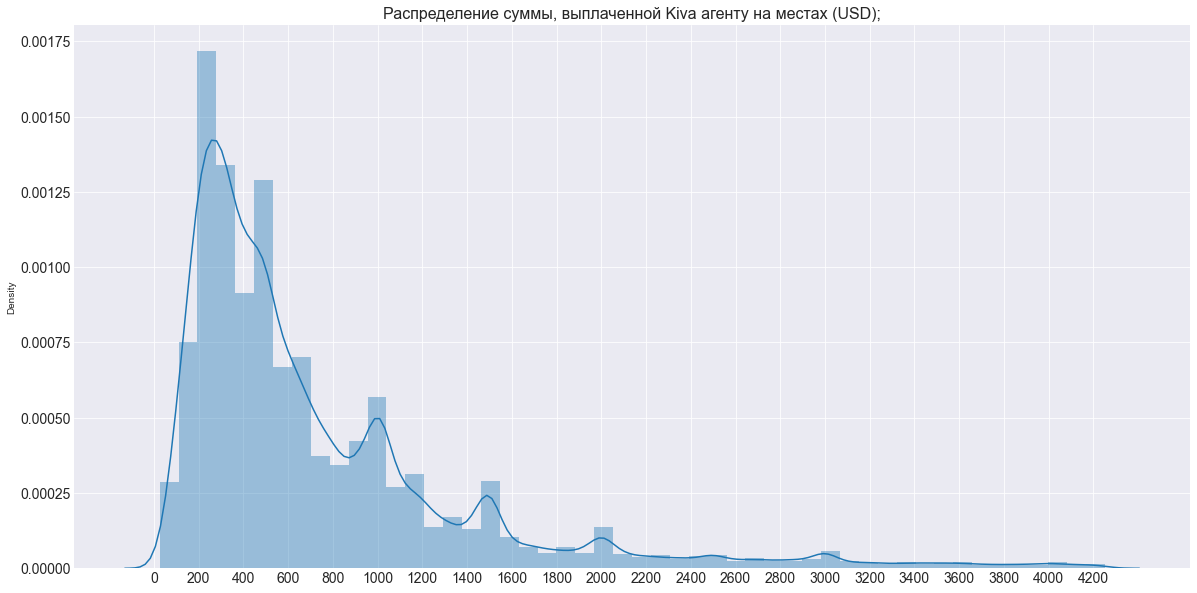

In [18]:
#Почистим данные от выбросов
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans1['funded_amount']-df_kiva_loans1['funded_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans1['funded_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans1[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение суммы, выплаченной Kiva агенту на местах (USD);", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['funded_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['funded_amount'], axlabel=False)
plt.show()

### Вывод
* Большинство суммы, выплаченной Kiva агенту на местах составляет от 100 до 600 долларов с пиковыми значениями  100 долларов и 250 долларов


### Задание 3. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены? 

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

In [19]:
# Сохраним датасет с большими суммами займа
df_bmoney = df_kiva_loans1[df_kiva_loans1.loan_amount > 20000]


### Большие займы в разрезе стран

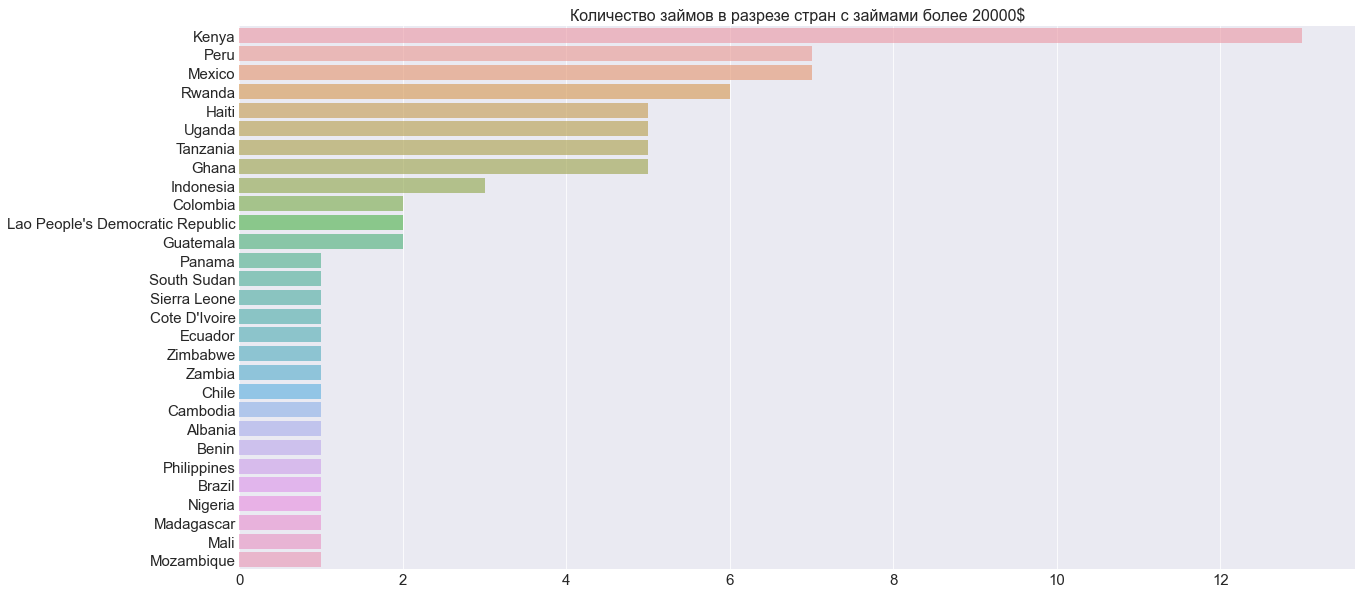

In [20]:
sectors = df_bmoney['country'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран с займами более 20000$", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

### Большие займы в разрезе секторов экономики.

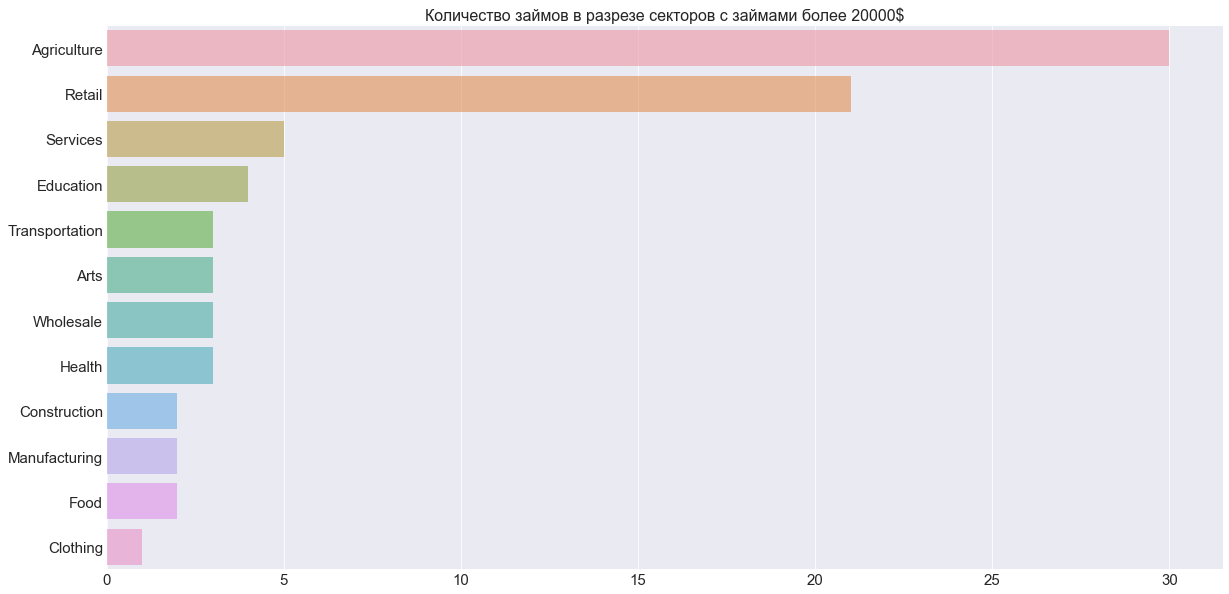

In [21]:

sectors = df_bmoney['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе секторов с займами более 20000$", fontsize=16)
# plt.xlabel('Number of loans', fontsize=16)
# plt.ylabel("Sectors", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

## Разрез видов деятельности

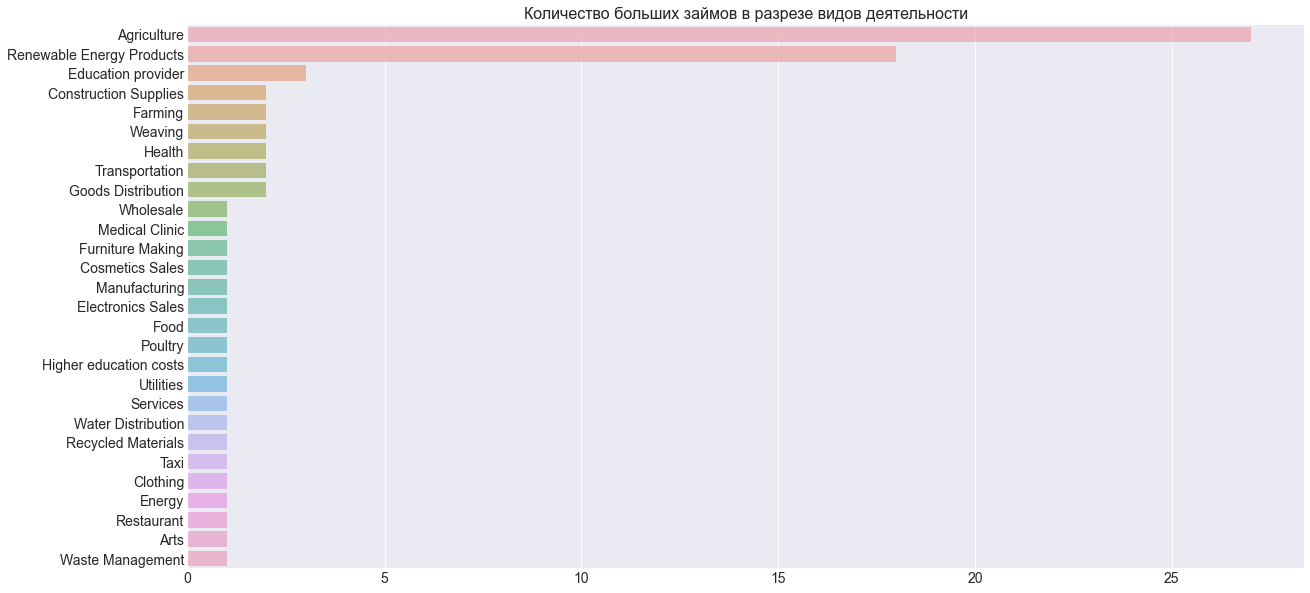

In [22]:
activities = df_bmoney['activity'].value_counts().head(30)

plt.figure(figsize=(20,10))
plt.title("Количество больших займов в разрезе видов деятельности", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show();

Наибольшее количество заявок с большими суммами в **Кении**, **Перу** **Мексике**. Сельское хозяйство прочно занимает первое место по займам. Это связано с тем, что во многих развивающихся странах, большой процент ВВП составляет сельское хозяйство. Возобновляемые источники энергии занимают вторую позицию. Опять же если у стран нет энергоресурсов, то для получения энергии нужно использовать возобновляемые источники энергии. Третью позицию заняло образование.

____________

### Посмотрим в разрезе стран куда берутся кредиты

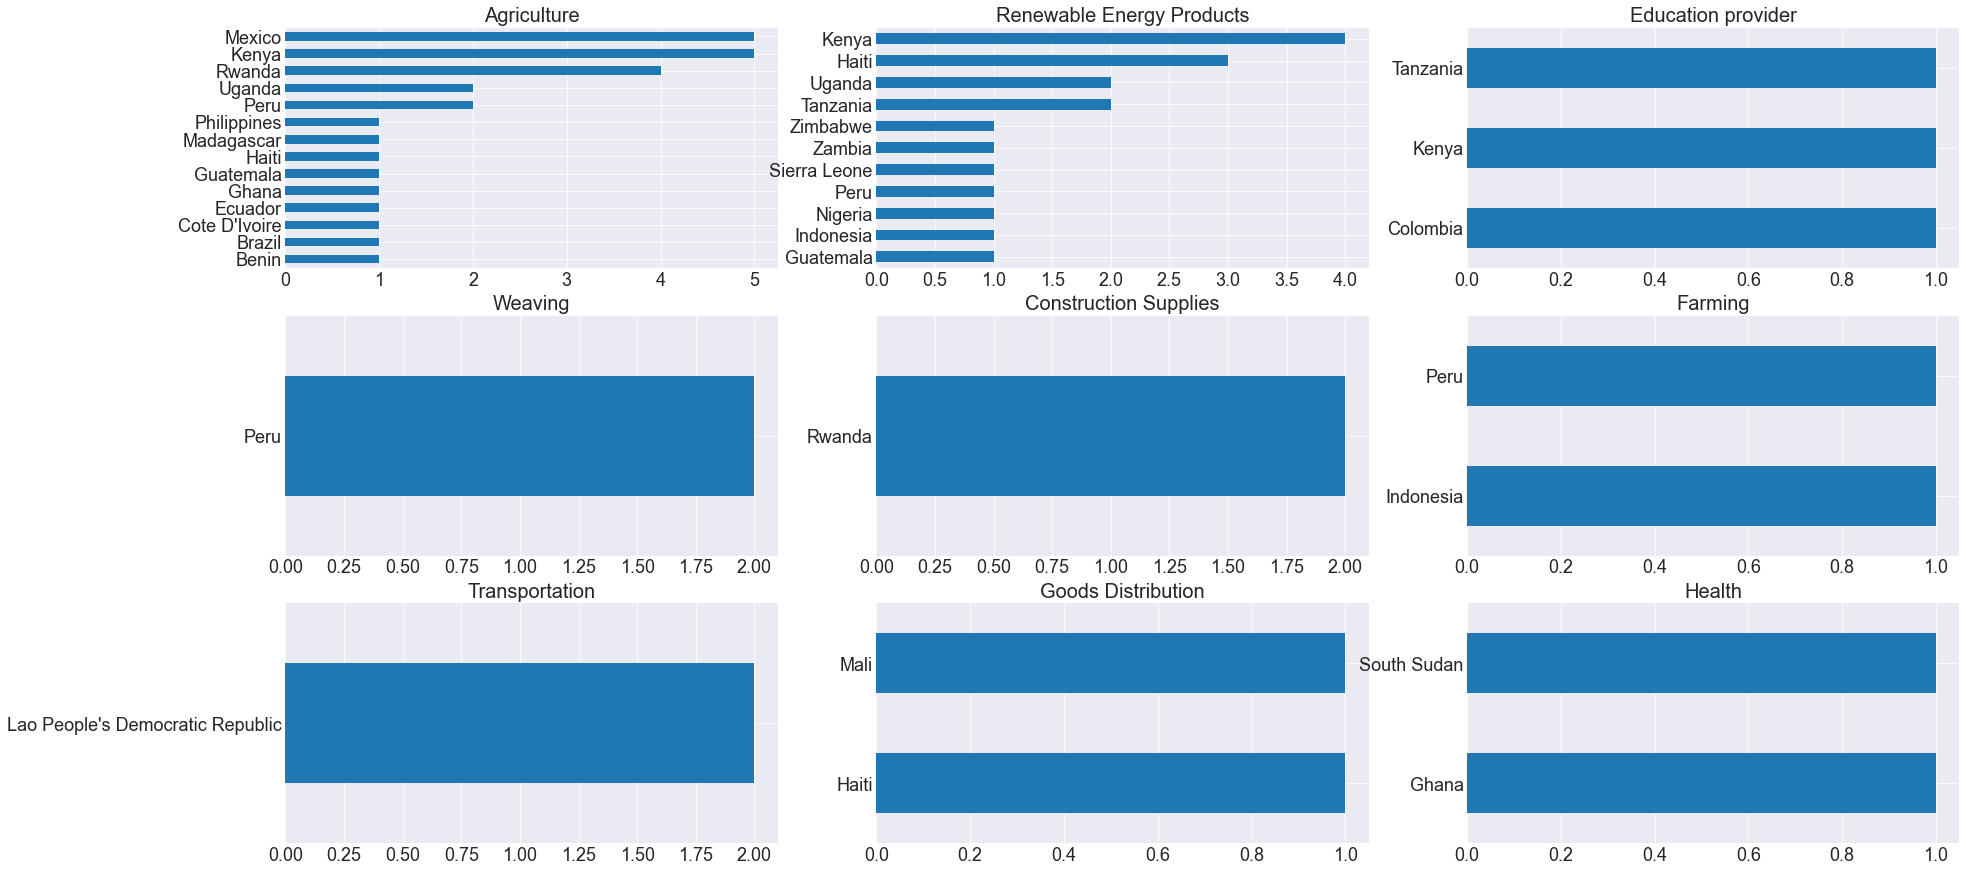

In [23]:
country_by_activity_sector = df_bmoney.groupby(['activity', 'country'])['loan_amount'].count().reset_index()
# проведем группировку по количеству кредитов
country_act= country_by_activity_sector.groupby('activity')['loan_amount'].sum(). \
            reset_index().   \
            sort_values(by='loan_amount', ascending=False)[0:10]

# Построим графические зависимости
fig,axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30,15))

for ax,q in zip(axes.ravel(), country_act.activity.unique()):
    tmp_df = country_by_activity_sector[country_by_activity_sector.activity.eq(q)]\
                .dropna()\
                .sort_values(by='loan_amount')
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
   
    
    tmp_df.plot.barh(x='country', ax=ax, legend=None, fontsize=18)

По сельскому хозяйству в лидерах по количеству больших кредитов является Мексика, Кения и Руанда. Руанда сама по себе Сельская страна и развитие этой отрасли в стране продолжается.
По возобновляемым источникам электроэнергии Кения, Гаити, Уганда и Танзания. Эти страны берут кредиты так как не имеют собственных энергоресурсов.
По образованию Колумбия, Танзания и Кения.

## Многомерный уровень бедности

### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [24]:
ser_mpi2 = df_mpi_got.groupby('region')['MPI'].mean().sort_values(ascending = False)[0:5].reset_index()
ser_mpi2
# В данной серии представлены города

,region,MPI
0,Lac,0.744
1,Wadi Fira,0.709
2,Sila,0.697
3,Kanem,0.696
4,Sahel,0.690


### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

<ipython-input-25-f76d37829f60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mpi_got['country'] = df_mpi_got['LocationName'].str.split(',').str[1]


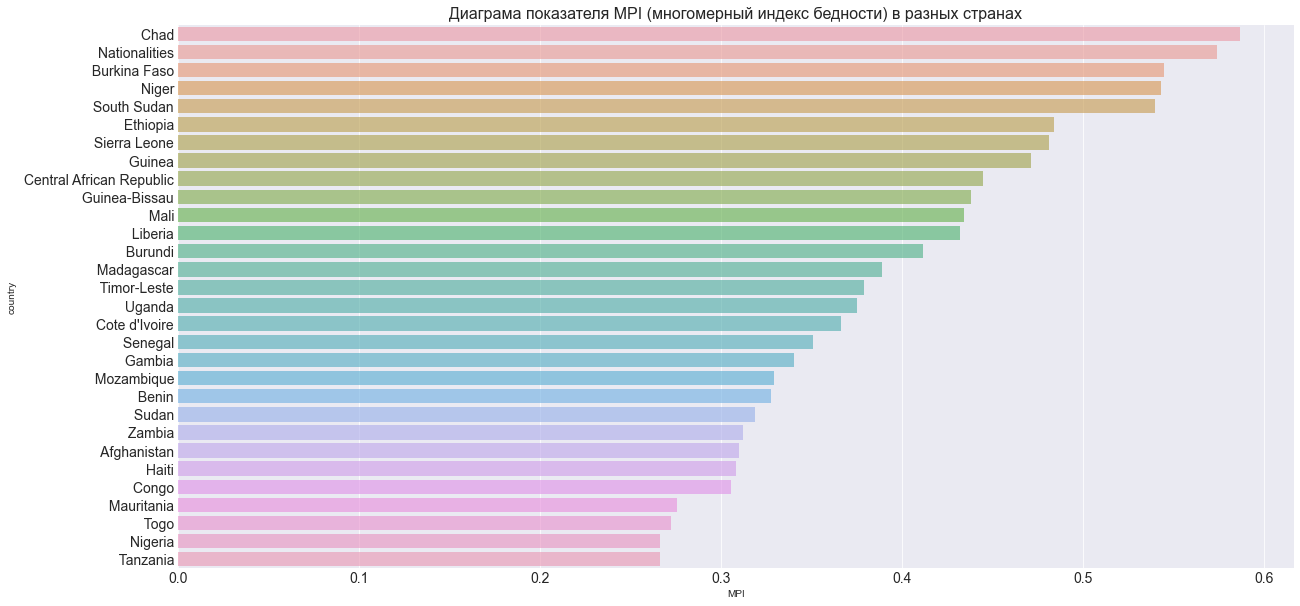

In [25]:
# Создадим новую колонку в датасете df_mpi
df_mpi_got['country'] = df_mpi_got['LocationName'].str.split(',').str[1]
# Проведем группировку по странам
df_group_mpi= df_mpi_got \
            .groupby('country') \
            .mean('MPI') \
            .sort_values(by='MPI', ascending=False) \
            .reset_index() \
            

df_group_mpi2 = df_group_mpi.set_index('country').head(30)
plt.figure(figsize=(20,10))
plt.title("Диаграма показателя MPI (многомерный индекс бедности) в разных странах", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=df_group_mpi2.index, x=df_group_mpi2.MPI, alpha=0.6)
plt.show();

In [26]:
#Определим страны к которым относятся топ-5 регионов по среднему уровню бедности
regiones = []
for i, reg in enumerate(ser_mpi2['region']):
    regiones.append(reg)
regiones
df_mpi_got[df_mpi_got['region'].isin(regiones)]['country']

65      Burkina Faso
887             Chad
888             Chad
898             Chad
900             Chad
Name: country, dtype: object

In [27]:
# Из графика диаграммы показателя бедности смущает занчение Nationalites. Посмотрим на это значение
df_mpi_got[df_mpi_got['country'].isin([' Nationalities'])]['LocationName']


270    Southern Nations, Nationalities, and People's ...
Name: LocationName, dtype: object

### Вывод
Если рассматривать по регионам откуда были взяты займы, то топ 5 беднейших регионов это страны Африки (Буркина Фасо и Чад). Если говорить в целом по странам откуда были взяты займы, то это:
* Чад
* Южные национальности
* Буркина Фасо
* Нигер
* Южный Судан

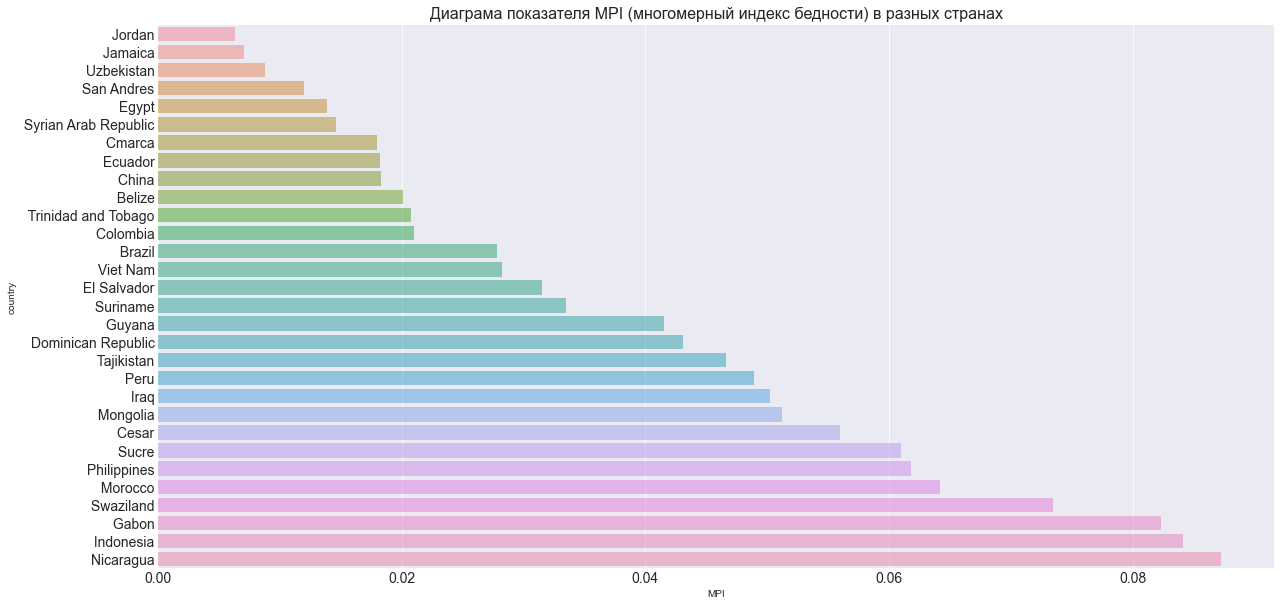

In [28]:
# Определим наименее бедные страны
df_group_mpi1= df_mpi_got \
            .groupby('country') \
            .mean('MPI') \
            .sort_values(by='MPI') \
            .reset_index() \
            

df_group_mpi3 = df_group_mpi1.set_index('country').head(30)
plt.figure(figsize=(20,10))
plt.title("Диаграма показателя MPI (многомерный индекс бедности) в разных странах", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=df_group_mpi3.index, x=df_group_mpi3.MPI, alpha=0.6)
plt.show();

### Вывод 
К наименее бедным странам, которые пользовались займами KIVA относятся:
* Иордания 
* Ямайка
* Узбекистан
* Сан Андрес
* Египет

`На график попала страна Сан Андреас. Таковой страны нет. Поэтому посмотрим по региону.`

In [29]:
# Из графика диаграммы показателя бедности смущает занчение Nationalites. Посмотрим на это значение
df_mpi_got[df_mpi_got['country'].isin([' San Andres'])]['LocationName']

205    Atlantico, San Andres, Bolivar Norte, Colombia
Name: LocationName, dtype: object

Это Колумбия